# A2: Predictiong Car Price

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.10.0')

## 1. Load data

In [3]:
df = pd.read_csv('../data/Cars.csv')

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
# Statistical 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

#### Data Cleaning and Preprocessing

map First owner to 1, ..., Test Drive Car to 5

In [9]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)

In [10]:
df['owner'].unique()

array([1, 2, 3, 4, 5])

For the feature fuel, remove all rows with CNG and LPG

In [11]:
df = df[~df['fuel'].isin(['CNG','LPG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split

In [12]:
df['mileage'] = df['mileage'].str.split().str[0]
df['mileage'] = df['mileage'].astype(float)
df['mileage'].unique()

array([23.4 , 21.14, 17.7 , 23.  , 16.1 , 20.14, 23.59, 20.  , 19.01,
       17.3 , 19.3 ,   nan, 18.9 , 18.15, 24.52, 19.7 , 22.54, 21.  ,
       25.5 , 26.59, 21.5 , 20.3 , 21.4 , 24.7 , 18.2 , 16.8 , 24.3 ,
       14.  , 18.6 , 23.95, 17.  , 20.63, 13.93, 16.  , 17.8 , 18.5 ,
       12.55, 12.99, 14.8 , 13.5 , 26.  , 20.65, 27.3 , 11.36, 17.68,
       14.28, 18.53, 14.84, 21.12, 20.36, 21.27, 18.16, 22.  , 25.1 ,
       20.51, 21.66, 25.2 , 22.9 , 16.02, 20.54, 22.77, 15.71, 23.1 ,
       19.02, 19.81, 16.47, 15.04, 19.1 , 21.79, 18.8 , 21.21, 15.37,
       11.79, 19.  , 14.3 , 15.8 , 15.1 , 19.09, 22.32, 21.9 , 14.53,
       21.63, 20.85, 20.45, 19.67, 23.01, 20.77, 17.92, 17.01, 22.37,
       19.33,  9.5 , 12.83, 22.48, 16.78, 14.67, 15.  , 13.96, 18.  ,
       12.07, 26.21, 10.8 , 16.3 , 13.6 , 14.74, 15.6 , 19.56, 22.69,
       19.16, 18.12, 12.1 , 17.5 , 42.  , 20.4 , 21.1 , 19.44, 13.  ,
       21.43, 22.95, 16.2 , 15.3 , 28.09, 17.4 , 19.4 , 17.6 , 28.4 ,
       14.1 , 25.17,

For the feature engine, remove “CC” and convert the column to numerical type (e.g., float). Do the same for max power

In [13]:
df['engine'] = df.engine.str.split().str[0].astype(float)

In [14]:
df['max_power'] = df.max_power.str.split().str[0].astype(float)

For the feature brand, take only the first word and remove the rest

In [15]:
df.rename(columns = {'name':'brand'},  inplace = True)
df['brand'] = df['brand'].str.split().str.get(0)
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [16]:
#Drop the feature torque,

df = df.drop(columns=['torque'])

In [17]:
#Delete 'Test Driver Car' sample
df = df[df['owner'] != 5]
df['owner'].unique()

array([1, 2, 3, 4])

In [18]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


## Univariate analysis

Distribution Plot

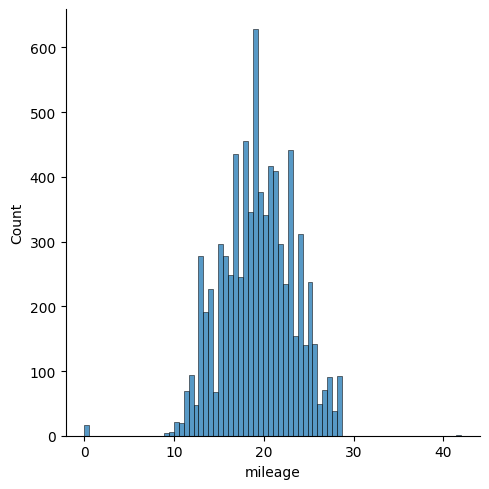

In [19]:
sns.displot(data = df, x = 'mileage')

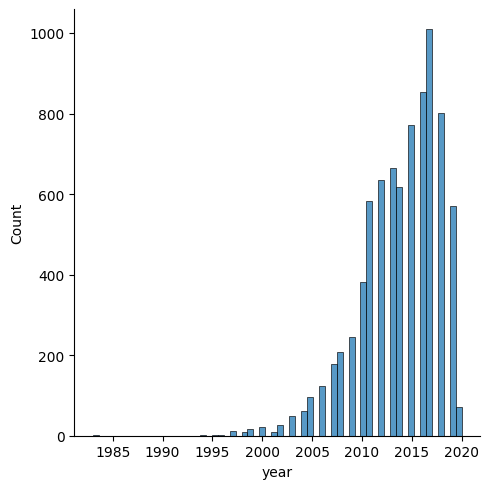

In [20]:
sns.displot(data = df, x = 'year')

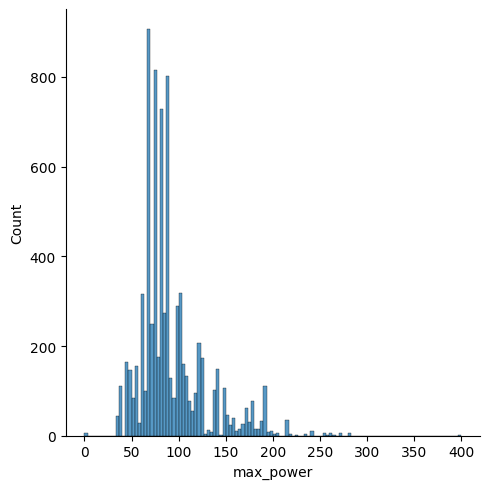

In [21]:
sns.displot(data = df, x = 'max_power')

### Correlation matrix
As the correlation matrix requires numerical values, I applied label encoding to the categorical features: ‘brand’, ‘fuel’, ‘transmission’, and ‘seller_type’.

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()

array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [23]:
# To view the mapping
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(label_mapping)

{'Ambassador': 0, 'Ashok': 1, 'Audi': 2, 'BMW': 3, 'Chevrolet': 4, 'Daewoo': 5, 'Datsun': 6, 'Fiat': 7, 'Force': 8, 'Ford': 9, 'Honda': 10, 'Hyundai': 11, 'Isuzu': 12, 'Jaguar': 13, 'Jeep': 14, 'Kia': 15, 'Land': 16, 'Lexus': 17, 'MG': 18, 'Mahindra': 19, 'Maruti': 20, 'Mercedes-Benz': 21, 'Mitsubishi': 22, 'Nissan': 23, 'Opel': 24, 'Peugeot': 25, 'Renault': 26, 'Skoda': 27, 'Tata': 28, 'Toyota': 29, 'Volkswagen': 30, 'Volvo': 31}


In [24]:
df['fuel'] = le.fit_transform(df['fuel'])

df['fuel'].unique()

array([0, 1])

In [25]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [26]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique()

array([1, 0])

In [27]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [28]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [29]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [30]:
# Apply log transformation to the 'selling_price' column
df['selling_price'] = np.log(df['selling_price'])

In [31]:
df['selling_price']

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: selling_price, Length: 8028, dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(7)
memory usage: 815.3 KB


<Axes: >

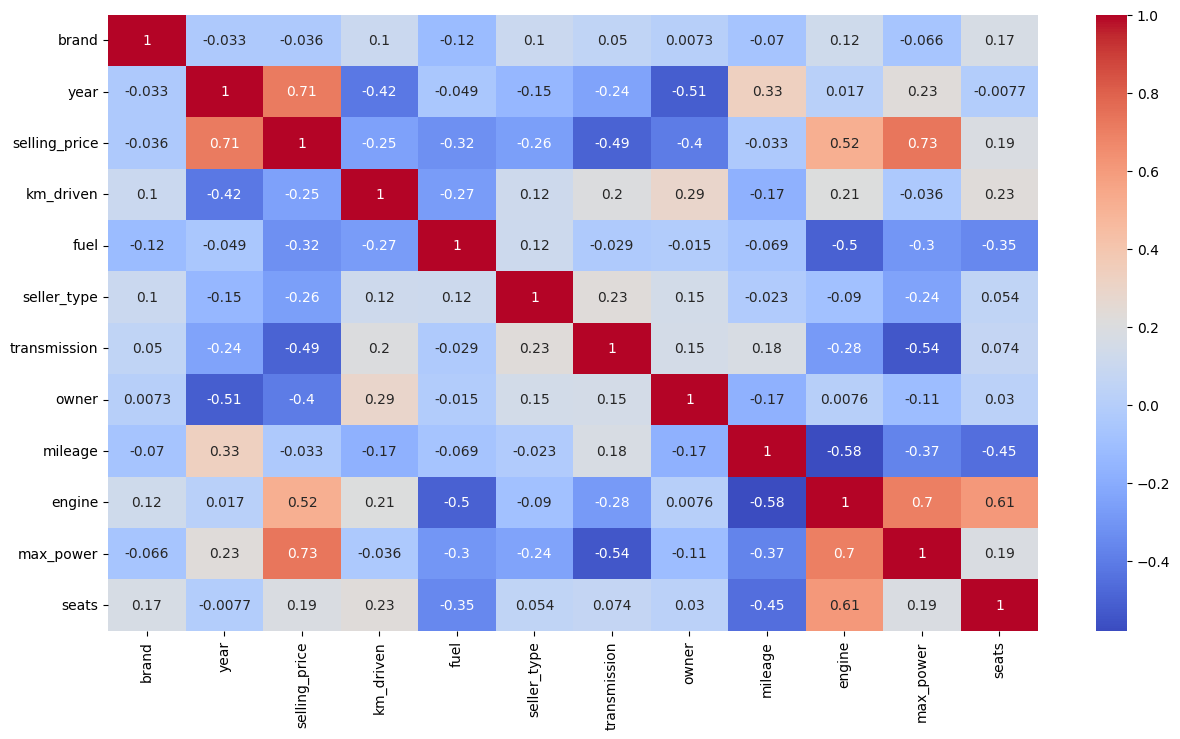

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

## 3. Feature Engineering

We gonna skip.

## 4. Feature selection

In [34]:
#x is our strong features
X = df[['year', 'mileage','max_power']]
y = df['selling_price']

In [35]:
X.shape , y.shape

((8028, 3), (8028,))

### Train test split

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

In [37]:
X_train.shape , X_test.shape

((6422, 3), (1606, 3))

In [38]:
y_train.shape , y_test.shape

((6422,), (1606,))

## 5. Preprocessing

### Null values

In [39]:
#check for null values
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    165
mileage      171
year           0
dtype: int64

In [40]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    43
mileage      43
year          0
dtype: int64

In [41]:
y_train.isna().sum()

np.int64(0)

In [42]:
y_test.isna().sum()

np.int64(0)

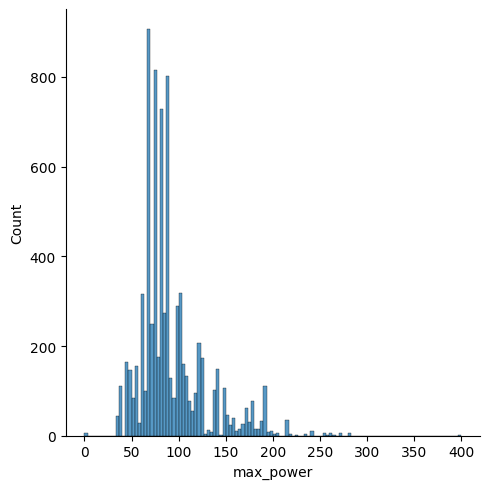

In [43]:
sns.displot(data=df, x='max_power')

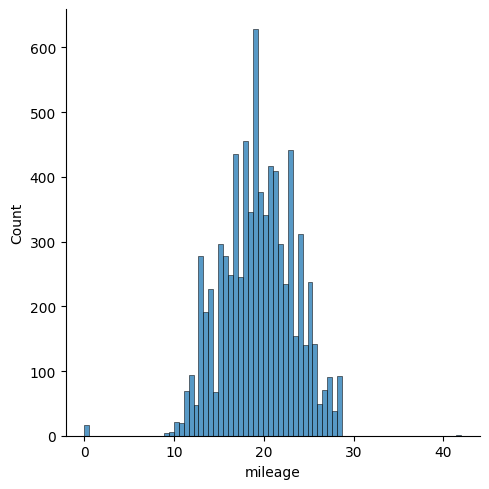

In [44]:
sns.displot(data=df, x='mileage')

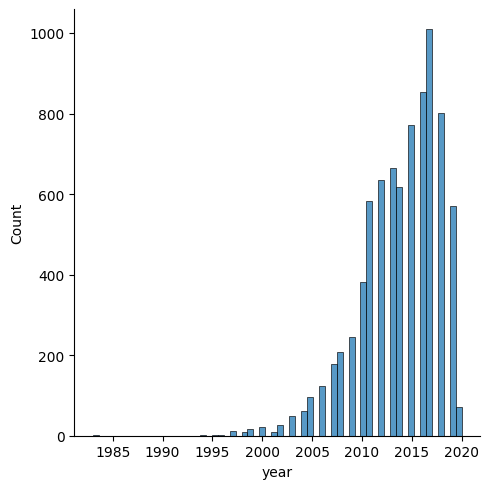

In [45]:
sns.displot(data=df, x='year')

In [46]:
#let's fill the training set first!

X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)


In [47]:

X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [48]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].median()

In [49]:
#check again
X_train[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [50]:
X_test[['max_power', 'mileage','year']].isna().sum()

max_power    0
mileage      0
year         0
dtype: int64

In [51]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

### Checking Outliers

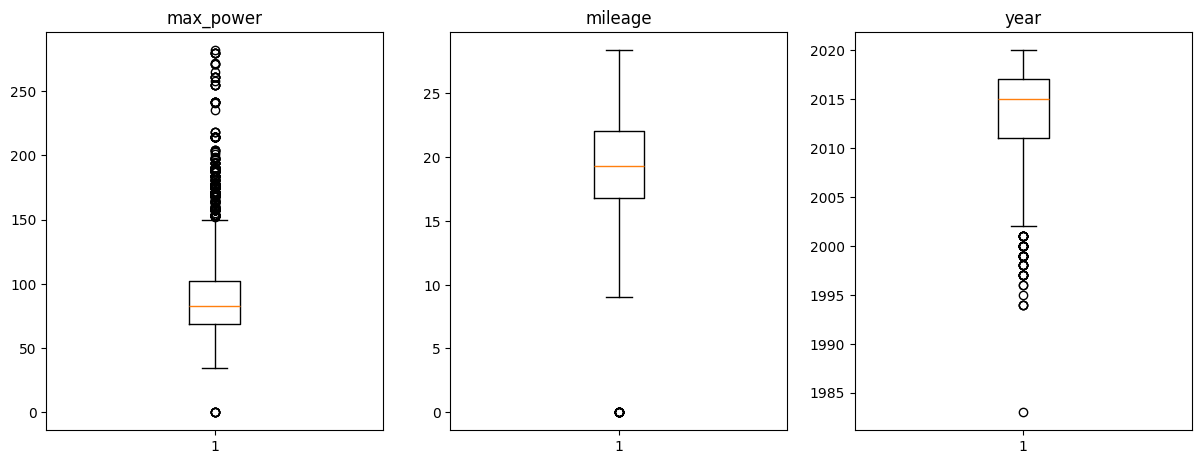

In [52]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2, 'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [53]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 63
Percent of data that is outlier: 0.98%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%


### Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [56]:
# y_train = y_train.values
y_train = y_train.to_numpy()


print(f'ytrain: {type(y_train)}')


ytrain: <class 'numpy.ndarray'>


In [57]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [58]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 4)
Shape of X_test:  (1606, 4)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


## 6. Modeling

1.	Added an r2 function to compute the R² score.
2.	Implemented Xavier initialization as an option for initializing theta.
3.	Implemented momentum-based gradient descent, allowing the user to choose whether to use momentum and specify its value.
4.	Added a function to plot feature importance, which visualizes the absolute values of coefficients.

In [59]:
import mlflow
import os

# Set MLflow tracking URI (make sure the MLflow server is running)
mlflow.set_tracking_uri("http://localhost:8080")

# Set user environment variable (optional)
os.environ["LOGNAME"] = "thangsiankhawm"

# Set experiment (it will create it if it doesn't exist)
mlflow.set_experiment("thangsiankhawm")

2025/02/19 01:19:29 INFO mlflow.tracking.fluent: Experiment with name 'thangsiankhawm' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/535014752488211916', creation_time=1739902769594, experiment_id='535014752488211916', last_update_time=1739902769594, lifecycle_stage='active', name='thangsiankhawm', tags={}>

In [60]:
import numpy as np
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, grad='batch', num_epochs=500, batch_size=50, cv=kfold, init_theta='xavier', momentum=0.0):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.grad       = grad
        self.cv         = cv
        self.regularization = regularization
        self.init_theta = init_theta
        self.momentum   = momentum
        self.prev_step  = None

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2_score(self, ytrue, ypred):
        ss_total = ((ytrue - ytrue.mean()) ** 2).sum()
        ss_residual = ((ytrue - ypred) ** 2).sum()
        return 1 - (ss_residual / ss_total)
    
    def initialize_weights(self, n_features):
        if self.init_theta == 'zero':
            return np.zeros(n_features)
        elif self.init_theta == 'xavier':
            lower, upper = - (1.0 / np.sqrt(n_features)), (1.0 / np.sqrt(n_features))
            return lower + np.random.rand(n_features) * (upper - lower)
    
    def fit(self, X_train, y_train):
        
        self.kfold_scores = list()
        self.val_loss_old = np.inf

        y_train = np.array(y_train)  

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = self.initialize_weights(X_cross_train.shape[1])
            self.prev_step = np.zeros_like(self.theta)  
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"grad": self.grad, "lr": self.lr, "reg": type(self).__name__, "init_theta": self.init_theta, "momentum": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.grad == 'sto':
                        
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_grad_train = X_cross_train[batch_idx].reshape(1, -1)
                            y_grad_train = np.array([y_cross_train[batch_idx]])     

                            train_loss = self._train(X_grad_train, y_grad_train)
                            train_loss = self._train(X_grad_train, y_grad_train)

                    elif self.grad == 'mini':

                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_grad_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_grad_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_grad_train, y_grad_train)
                    else:
                        
                        X_grad_train = X_cross_train
                        y_grad_train = y_cross_train
                        train_loss = self._train(X_grad_train, y_grad_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)

                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
    def _train(self, X, y):

        yhat = self.predict(X)
        m = X.shape[0]

        grad = (1/m) * X.T @ (yhat - y)

        if self.regularization is not None:  
            grad += self.regularization.derivation(self.theta)

        step = self.lr * grad
        if self.momentum > 0:
            self.theta = self.theta - step + self.momentum * self.prev_step
            self.prev_step = step
        else:
            self.theta = self.theta - step

        return self.mse(y, yhat)

    
    def predict(self, X):
        return X @ self.theta  
    
    def _coef(self):
        return self.theta[1:]  
                               
    def _bias(self):
        return self.theta[0]
    
    def feature_importance(self):
        feature_names = ["max_power", "mileage", "year"]
        importance_values = [abs(self._coef()[0]), abs(self._coef()[1]), abs(self._coef()[2])]

        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,max(self._coef())*1.3]) 
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()

In [61]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class Lasso(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Ridge(LinearRegression):
    def __init__(self, grad, lr, l=0.1, init_theta='xavier', momentum=0.0):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, grad, init_theta=init_theta, momentum=momentum)

class Normal(LinearRegression):
    def __init__(self, grad, lr, init_theta='xavier', momentum=0.0):
        super().__init__(None,  lr, grad, init_theta=init_theta, momentum=momentum)

In [62]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [63]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["True", "False"]

regs = ["Ridge", "Lasso", "Normal"]

grads = ["batch", "mini", "sto"]

init_theta = ["zero", "xavier"]

momentums = [0.0, 0.9]

learning_rates = [0.01, 0.001, 0.0001]

POLY_DEGREE = 1
poly_transformer = PolynomialFeatures(degree=POLY_DEGREE)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.transform(X_test)

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grad} =====")
                        print(f"===== Init_Method: {theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            X_train_used = X_train_poly
                            X_test_used = X_test_poly
                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        with mlflow.start_run(run_name=f"{reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}", nested=True):

                            mlflow.log_params(params=params)
                            model = type_of_regression(**params)
                            model.fit(X_train_used, y_train)

                            yhat_train = model.predict(X_train_used)
                            yhat_test = model.predict(X_test_used)
              
                            mlflow.log_metric(key="train_mse", value=model.mse(y_train, yhat_train))
                            mlflow.log_metric(key="train_r2", value=model.r2_score(y_train, yhat_train))
                            mlflow.log_metric(key="test_mse", value=model.mse(y_test, yhat_test))
                            mlflow.log_metric(key="test_r2", value=model.r2_score(y_test, yhat_test))

                            print(f"Completed run: {reg}-grad-{grad}-lr-{lr}-init-{theta}-momentum-{momentum}-poly-{poly}")

                            signature = mlflow.models.infer_signature(X_train_used, model.predict(X_train_used))
                            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

Using Polynomial Degree: 1
===== Regularization: Ridge =====
===== Grad: batch =====
===== Init_Method: zero =====
===== Momentum: 0.0 =====
===== Learning Rate: 0.01 =====
Fold 0: 1.5587400612490956
🏃 View run Fold-0 at: http://localhost:8080/#/experiments/535014752488211916/runs/92d7111f10f343c284ac3bd279dfb1f3
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916
Fold 1: 1.5240586358012456
🏃 View run Fold-1 at: http://localhost:8080/#/experiments/535014752488211916/runs/394cee974d314261aca460cec65bdba9
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916
Fold 2: 1.500849509714715
🏃 View run Fold-2 at: http://localhost:8080/#/experiments/535014752488211916/runs/2f41b0f9bb954349aca8f2a8ebad9f77
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916
Completed run: Ridge-grad-batch-lr-0.01-init-zero-momentum-0.0-poly-True
🏃 View run Ridge-grad-batch-lr-0.01-init-zero-momentum-0.0-poly-True at: http://localhost:8080/#/e

In [64]:
import numpy as np
import mlflow
from sklearn.preprocessing import PolynomialFeatures

polynomials = ["False"]

regs = ["Normal"]

grads = ["sto"]

init_theta = ["zero"]

momentums = [0.9]

learning_rates = [0.0001]

for poly in polynomials:
    for reg in regs:
        for grad in grads:
            for theta in init_theta:
                for momentum in momentums:
                    for lr in learning_rates:

                        print("="*40)
                        print(f"Using Polynomial Degree: {POLY_DEGREE}" if poly == "True" else "Polynomial: False")
                        print(f"===== Regularization: {reg} =====")
                        print(f"===== Grad: {grads} =====")
                        print(f"===== Init_Method: {init_theta} =====")
                        print(f"===== Momentum: {momentum} =====")
                        print(f"===== Learning Rate: {lr} =====")
                        print("="*40)
                        
                        type_of_regression = str_to_class(reg)
                        params = {"grad": grad, "lr": lr, "init_theta": theta, "momentum": momentum}

                        if poly == "True":
                            POLY_DEGREE = 1
                            poly_transformer = PolynomialFeatures(degree=POLY_DEGREE, include_bias=False)
                            X_train_poly = poly_transformer.fit_transform(X_train)
                            X_test_poly = poly_transformer.transform(X_test)

                            X_train_used = X_train_poly
                            X_test_used = X_test_poly

                        else:
                            X_train_used = X_train
                            X_test_used = X_test

                        model = type_of_regression(**params)
                        model.fit(X_train_used, y_train)

Polynomial: False
===== Regularization: Normal =====
===== Grad: ['sto'] =====
===== Init_Method: ['zero'] =====
===== Momentum: 0.9 =====
===== Learning Rate: 0.0001 =====
Fold 0: 0.12971406640068187
🏃 View run Fold-0 at: http://localhost:8080/#/experiments/535014752488211916/runs/7876d4b9eb464558a4af90cd809ee314
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916
Fold 1: 0.1173791378243563
🏃 View run Fold-1 at: http://localhost:8080/#/experiments/535014752488211916/runs/903fd88a99ae4e60b3e8a00f19db7a7e
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916
Fold 2: 0.1106947581314963
🏃 View run Fold-2 at: http://localhost:8080/#/experiments/535014752488211916/runs/237de232e91b46da8351de5bbaa2ad95
🧪 View experiment at: http://localhost:8080/#/experiments/535014752488211916


In [65]:
# Testing the model with testing set and show mse and r2
yhat = model.predict(X_test)
mse  = model.mse(y_test, yhat)
r2 = model.r2_score(y_test, yhat)
print("MSE :", mse)
print("R2 :", r2)

MSE : 0.10887105758196276
R2 : 0.8471215696480314


In [66]:
year_default = 2023        
mileage_default = 23.4  
max_power_default = 67

In [67]:
import pickle
model_package = {
    'model': model,
    'scaler': scaler,
    'max_power': max_power_default,
    'mileage': mileage_default,
    'year': year_default
}

In [68]:

filename = '../model/car_price_new.model'
pickle.dump(model_package, open(filename, 'wb'))

In [69]:
loaded_data = pickle.load(open(filename, 'rb'))

# Loading the model and scaler to test
loaded_model = loaded_data['model']
loaded_scaler = loaded_data['scaler']

In [70]:
# Create array of sample data
#['year', 'mileage','max_power']
sample_np = np.array([[2014, 21.14, 103.52]])
sample_scaled = loaded_scaler.transform(sample_np)
intercept = np.ones((sample_scaled.shape[0], 1))

sample_scaled_concat  = np.concatenate((intercept, sample_scaled), axis=1)
sample_scaled_concat


array([[1.        , 0.04494691, 0.44338931, 0.34024827]])

In [71]:
predicted_price = model.predict(sample_scaled_concat)
predicted_price = np.exp(predicted_price)  

print(f"Predicted Car Price: {predicted_price}")

Predicted Car Price: [519365.32599819]
